<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/03_Unsupervised_modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec 
random_state = 747

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
!pip install pyLDAvis

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
questions = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/questions1.csv')
questions = questions.iloc[:, 1:]#questions.drop('Unnamed: 0', axis=1)

tags = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/tags.csv')
tags = tags.iloc[:, 1:]#questions.drop('Unnamed: 0', axis=1)

In [78]:
questions

,Question
0,pandas pandas list dataframe object
1,php string
2,json performance json function select json joi...
3,java java class class static string join join ...
4,stream video browser stream video browser vide...
...,...
39995,scala scala configuration module java scala ty...
39996,flutter function button build function function
39997,routing url browser class import dom class con...
39998,python post twitter post python import import ...


In [79]:
tags

,Tag_st
0,python pandas
1,php
2,performance postgresql
3,java multithreading
4,flash video stream
...,...
39995,scala intellij-idea
39996,dart flutter
39997,reactjs webpack redux
39998,python twitter


In [80]:
questions['Question'] = questions['Question'].apply(lambda text: str(text).split())
tags['Tag_st'] = tags['Tag_st'].apply(lambda text: str(text).split())

In [81]:
questions = questions['Question'] 
questions.head(10)

0            [pandas, pandas, list, dataframe, object]
1                                        [php, string]
2    [json, performance, json, function, select, js...
3    [java, java, class, class, static, string, joi...
4    [stream, video, browser, stream, video, browse...
5    [pandas, pandas, date, indexing, date, date, d...
6                                           [dns, php]
7    [php, ide, constants, reflection, web, php, ph...
8                                            [process]
9    [jquery, javascript, jquery, javascript, jquer...
Name: Question, dtype: object

In [82]:
tags = tags['Tag_st'] 
tags.head(10)

0             [python, pandas]
1                        [php]
2    [performance, postgresql]
3       [java, multithreading]
4       [flash, video, stream]
5                     [pandas]
6            [php, mysql, dns]
7                        [php]
8           [ios, objective-c]
9         [javascript, jquery]
Name: Tag_st, dtype: object

In [83]:
from gensim import corpora
dictionary = corpora.Dictionary(questions)
corpus = [dictionary.doc2bow(text) for text in questions]

In [84]:
len(dictionary)

358

In [85]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 5), (10, 2), (11, 1), (12, 1), (13, 1), (14, 6)],
 [(5, 1), (8, 2), (15, 4), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1)],
 [(21, 3),
  (22, 2),
  (23, 5),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 11),
  (28, 6),
  (29, 1)],
 [(3, 2), (6, 4), (30, 1)],
 [(4, 1), (31, 1)],
 [(4, 5),
  (7, 1),
  (15, 1),
  (29, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2)],
 [(38, 1)],
 [(7, 1), (26, 2), (39, 3)],
 [(40, 1)],
 [(13, 1), (41, 1), (42, 1)],
 [(9, 3), (14, 1), (43, 1), (44, 1), (45, 1)],
 [(25, 1), (32, 2)],
 [(14, 1), (41, 4), (46, 3), (47, 4)],
 [(2, 1)],
 [(15, 2), (21, 1), (29, 1), (48, 1), (49, 1), (50, 1), (51, 2)],
 [(5, 1), (15, 1), (17, 6), (43, 3), (52, 2)],
 [(2, 3),
  (3, 2),
  (5, 4),
  (6, 2),
  (13, 4),
  (14, 1),
  (16, 1),
  (22, 16),
  (42, 1),
  (53, 2),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 22),
  (58, 3),
  (59, 12),
  (60, 1),
  (61, 3),
  (62, 1)],
 [(1, 1), (6

In [86]:
len(corpus)

40000

In [87]:
len(dictionary)

358

In [88]:
from gensim.models import CoherenceModel

In [89]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values =[]
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values

In [90]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=questions, start=2, limit=40, step=2) 

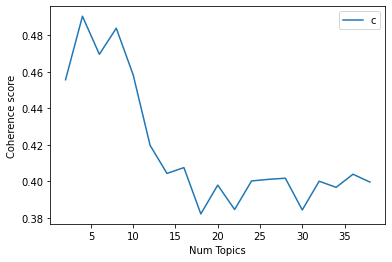

In [91]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [92]:
for nt, cs in zip(x, coherence_values):
  print("Num Topics =", nt, "is having Coherence score of", round(cs, 4))

Num Topics = 2 is having Coherence score of 0.4557
Num Topics = 4 is having Coherence score of 0.4905
Num Topics = 6 is having Coherence score of 0.4696
Num Topics = 8 is having Coherence score of 0.4839
Num Topics = 10 is having Coherence score of 0.4584
Num Topics = 12 is having Coherence score of 0.4197
Num Topics = 14 is having Coherence score of 0.4043
Num Topics = 16 is having Coherence score of 0.4075
Num Topics = 18 is having Coherence score of 0.3821
Num Topics = 20 is having Coherence score of 0.3979
Num Topics = 22 is having Coherence score of 0.3845
Num Topics = 24 is having Coherence score of 0.4002
Num Topics = 26 is having Coherence score of 0.401
Num Topics = 28 is having Coherence score of 0.4017
Num Topics = 30 is having Coherence score of 0.3842
Num Topics = 32 is having Coherence score of 0.4
Num Topics = 34 is having Coherence score of 0.3966
Num Topics = 36 is having Coherence score of 0.4038
Num Topics = 38 is having Coherence score of 0.3995


In [93]:
lda = gensim.models.ldamodel.LdaModel

In [94]:
ldamodel = lda(corpus, num_topics=8, id2word = dictionary, passes=50)

In [95]:
#print("LDA model is: \n", ldamodel.print_topics(num_topics=8, num_words=10))
print("LDA model is: \n")
for idx, topic in ldamodel.print_topics(num_topics=8, num_words=5):
    print("Topic: {} \nTags: {}".format(idx, topic))
    #print("\n")

LDA model is: 

Topic: 0 
Tags: 0.223*"text" + 0.118*"input" + 0.114*"button" + 0.072*"select" + 0.033*"ios"
Topic: 1 
Tags: 0.340*"java" + 0.057*"xml" + 0.043*"spring" + 0.043*"apache" + 0.037*"build"
Topic: 2 
Tags: 0.224*"file" + 0.178*"c" + 0.059*"python" + 0.050*"path" + 0.039*"windows"
Topic: 3 
Tags: 0.400*"android" + 0.156*"image" + 0.113*"layout" + 0.043*"django" + 0.031*"vector"
Topic: 4 
Tags: 0.220*"function" + 0.088*"html" + 0.070*"php" + 0.052*"database" + 0.042*"javascript"
Topic: 5 
Tags: 0.142*"import" + 0.081*"model" + 0.069*"api" + 0.062*"service" + 0.062*"web"
Topic: 6 
Tags: 0.230*"string" + 0.152*"list" + 0.069*"url" + 0.060*"json" + 0.052*"r"
Topic: 7 
Tags: 0.241*"class" + 0.086*"object" + 0.073*"null" + 0.061*"time" + 0.059*"set"


In [127]:
def main_topics(model=ldamodel, corpus=corpus, texts=questions, tags=tags):
  topics_df = pd.DataFrame()

  for i, row in enumerate(model[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:
        wp = model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  topics_df.columns = ['Main_Topic', 'Importance', 'Topic_Keywords']

  contents = pd.Series(texts)
  tags = pd.Series(tags)
  topics_df = pd.concat([topics_df, contents, tags], axis=1)
  return(topics_df)

df_topic_keywords = main_topics(model=ldamodel, corpus=corpus, texts=questions, tags=tags)

df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns = ['Question_No', 'Main_Topic', 'Importance', 'Tags_pred', 'Question', 'Tags_True']



In [128]:
def remove_space(body):
  return ''.join(str(body).split())

In [129]:
df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(remove_space)

In [130]:
df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(lambda text: str(text).split())

In [131]:
df_dominant_topic.head(10)

,Question_No,Main_Topic,Importance,Tags_pred,Question,Tags_True
0,0,5.0,0.5409,"[import,model,api,service,web,module,angular,w...","[pandas, pandas, list, dataframe, object]","[python, pandas]"
1,1,4.0,0.3750,"[function,html,php,database,javascript,css,jqu...","[php, string]",[php]
2,2,7.0,0.6327,"[class,object,null,time,set,date,static,string...","[json, performance, json, function, select, js...","[performance, postgresql]"
3,3,7.0,0.5293,"[class,object,null,time,set,date,static,string...","[java, java, class, class, static, string, joi...","[java, multithreading]"
4,4,7.0,0.3145,"[class,object,null,time,set,date,static,string...","[stream, video, browser, stream, video, browse...","[flash, video, stream]"
5,5,7.0,0.5156,"[class,object,null,time,set,date,static,string...","[pandas, pandas, date, indexing, date, date, d...",[pandas]
6,6,4.0,0.3750,"[function,html,php,database,javascript,css,jqu...","[dns, php]","[php, mysql, dns]"
7,7,4.0,0.4453,"[function,html,php,database,javascript,css,jqu...","[php, ide, constants, reflection, web, php, ph...",[php]
8,8,2.0,0.5624,"[file,c,python,path,windows,build,process,c++,...",[process],"[ios, objective-c]"
9,9,4.0,0.8750,"[function,html,php,database,javascript,css,jqu...","[jquery, javascript, jquery, javascript, jquer...","[javascript, jquery]"


In [132]:

df_tags = df_dominant_topic[['Tags_True', 'Tags_pred']]
df_tags

,Tags_True,Tags_pred
0,"[python, pandas]","[import,model,api,service,web,module,angular,w..."
1,[php],"[function,html,php,database,javascript,css,jqu..."
2,"[performance, postgresql]","[class,object,null,time,set,date,static,string..."
3,"[java, multithreading]","[class,object,null,time,set,date,static,string..."
4,"[flash, video, stream]","[class,object,null,time,set,date,static,string..."
...,...,...
39995,"[scala, intellij-idea]","[text,input,button,select,ios,video,docker,sca..."
39996,"[dart, flutter]","[function,html,php,database,javascript,css,jqu..."
39997,"[reactjs, webpack, redux]","[import,model,api,service,web,module,angular,w..."
39998,"[python, twitter]","[import,model,api,service,web,module,angular,w..."


In [143]:
from sklearn.externals import joblib
from joblib import load, dump

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [146]:
dict_tags_500 = joblib.load('/content/drive/My Drive/CentraleSupelec_OCR/P6/list_tag_key_500.joblib')
print(dict_tags_500)

{'f#', 'hibernate', 'winapi', 'html', 'node.js', 'sass', 'jquery', 'c++11', 'codeigniter', 'types', 'validation', 'asp.net-web-api', 'activerecord', 'exception', 'mongodb', 'split', 'unix', 'function', 'iframe', 'twitter-bootstrap-3', 'twitter', 'browser', 'jackson', 'loops', 'sharepoint', 'vb.net', 'networking', 'lua', 'android-studio', 'macos', 'apache-spark', 'layout', 'stored-procedures', 'forms', 'internet-explorer', 'opengl-es', 'ecmascript-6', 'tkinter', 'button', 'firefox', 'clang', 'batch-file', 'random', 'flask', 'algorithm', 'class', 'filesystems', 'data-binding', 'amazon-s3', 'jquery-ui', 'scroll', 'symfony', 'indexing', 'python-2.7', 'amazon-ec2', 'floating-point', 'vim', 'perl', 'ggplot2', 'qt', 'parameters', 'user-interface', 'dns', 'web-applications', 'angular-material', 'django', 'c++17', 'sockets', 'visual-c++', 'csv', 'winforms', 'video', 'cookies', 'sed', 'lambda', 'sqlite', 'laravel', 'apache-spark-sql', 'google-maps', 'optimization', 'ffmpeg', 'tensorflow', 'rxjs'

In [149]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(dict_tags_500))
df_tags_num_true = mlb.fit_transform(df_tags['Tags_True'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['nan'] will be ignored
  .format(sorted(unknown, key=str)))


In [151]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(dict_tags_500 ))
df_tags_num_pred = mlb.fit_transform(df_tags['Tags_pred'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['android,image,layout,django,vector,r,memory,firebase,audio,perl', 'class,object,null,time,set,date,static,string,integer,methods', 'file,c,python,path,windows,build,process,c++,ruby,linux', 'function,html,php,database,javascript,css,jquery,git,mysql,sql', 'import,model,api,service,web,module,angular,webpack,npm,matrix', 'java,xml,spring,apache,build,exception,gradle,eclipse,io,session', 'string,list,url,json,r,http,post,search,scope,split', 'text,input,button,select,ios,video,docker,scala,binding,events'] will be ignored
  .format(sorted(unknown, key=str)))


In [152]:
from sklearn.metrics import jaccard_score, make_scorer, jaccard_similarity_score
from gensim.matutils import jaccard

In [156]:
lda_jss_score = jaccard_similarity_score(df_tags_num_true, df_tags_num_pred)
print(f"Score: {lda_jss_score}")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Score: 0.057375


In [ ]:
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_visualisation = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualisation)

In [ ]:
#wordvec = Word2Vec(questions, min_count=1)

In [ ]:
#print('wordvec:', wordvec)

In [ ]:
#words = list(wordvec.wv.vocab)

In [ ]:
#print("\nwords", words)

In [ ]:
#print("\nwordvec['function'] :", wordvec['function'])

In [ ]:
#wordvec.save('wordvec.bin')

In [ ]:
#new_wordvec = Word2Vec.load('wordvec.bin')

In [ ]:
#print("\nloaded wordvec", new_wordvec)

In [ ]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from matplotlib import pyplot

In [ ]:
#X = wordvec[wordvec.wv.vocab]
#pca = PCA(n_components=2)
#tsne = TSNE(n_components=2)
#result = tsne.fit_transform(X)

In [ ]:
#plt.figure(figsize=(25,25))
#pyplot.scatter(result[:, 0], result[:, 1], s=5, alpha=0.5)
#for i, word in enumerate(words):
  #pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
#pyplot.show()